# Home Cage Interaction Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\mpfc_csvs"

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac_csvs"

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n1-240508-080051\Notes.txt
read from t=0s to t=1783.78s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Home_Cage\nac\n2-240508-092906\Notes.txt
read from t=0s to t=1810.33s
Processing n1-240508-080051...
Processing n2-240508-092906...


In [4]:
group_data.hc_processing()

Processing n1-240508-080051...
Processing n2-240508-092906...


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_y_across_bouts(df, title='Mean Across Bouts', ylabel='Mean Value'):
    """
    Plots the mean values during investigations or other events across bouts with error bars for SEM
    and individual subject lines connecting the bouts.

    Parameters:
    - df (DataFrame): A DataFrame where rows are subjects, and columns are bouts.
                      Values should represent the mean values (e.g., mean DA, investigation times)
                      for each subject and bout.
    - title (str): The title for the plot.
    - ylabel (str): The label for the y-axis.
    """

    # Calculate the mean and SEM for each bout (across all subjects)
    mean_values = df.mean()
    sem_values = df.sem()

    # Create the plot
    fig, ax = plt.subplots(figsize=(16, 6))

    # Plot the bar plot with error bars (mean and SEM)
    bars = ax.bar(df.columns, mean_values, yerr=sem_values, capsize=5, color='skyblue', edgecolor='black', label='Mean')

    # Plot each individual's mean value and connect the dots between bars
    colors = plt.cm.get_cmap('tab10', len(df))  # Use a colormap with enough unique colors for each subject

    for i, subject in enumerate(df.index):
        ax.plot(df.columns, df.loc[subject], marker='o', linestyle='-', color=colors(i), alpha=0.7, label=subject)

    # Add labels, title, and format
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel('Bouts', fontsize=12)
    ax.set_title(title, fontsize=14)

    # Set x-ticks to match the bout labels
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, fontsize=12)

    # Automatically set the y-limits based on the data range
    all_values = np.concatenate([df.values.flatten(), mean_values.values.flatten()])
    min_val = np.nanmin(all_values)
    max_val = np.nanmax(all_values)

    # Set lower y-limit to 0 if all values are above 0, otherwise set to the minimum value
    lower_ylim = 0 if min_val > 0 else min_val * 1.1
    upper_ylim = max_val * 1.3  # Adding a bit of space above the highest value
    
    ax.set_ylim(lower_ylim, upper_ylim)

    # Add the legend on the right side, outside the plot
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Subjects")

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example of how to use the function:
# plot_y_across_bouts(df, title="Mean DA Across Bouts", ylabel="Mean DA (z-score)")


## Mean Investigation Per bout

In [6]:
# Define the columns representing the bouts
columns = ['Bout_Short_Term_1', 'Bout_Short_Term_2', 'Bout_Novel_1', 'Bout_Long_Term_1']

# Initialize an empty list to hold the data for each subject
data_list = []

# Populate the data_list from the group_data.blocks
for block_data in group_data.blocks.values():
    if hasattr(block_data, 'bout_dict') and block_data.bout_dict:  # Ensure bout_dict exists and is populated
        # Use the subject name from the TDTData object
        block_data_dict = {'Subject': block_data.subject_name}
        
        for bout in columns:  # Only process bouts in the given list of columns
            if bout in block_data.bout_dict and 'Investigation' in block_data.bout_dict[bout]:
                # Collect the mean investigation duration for this subject and bout
                total_duration = np.nanmean([event['Total Duration'] for event in block_data.bout_dict[bout]['Investigation']])
                block_data_dict[bout] = total_duration
            else:
                block_data_dict[bout] = np.nan  # If no data, assign NaN
                
        # Append the block's data to the data_list
        data_list.append(block_data_dict)

# Convert the data_list into a DataFrame
inv_duration_df = pd.DataFrame(data_list)

# Set the index to 'Subject'
inv_duration_df.set_index('Subject', inplace=True)

# Print the DataFrame to verify the data
inv_duration_df.head()


,Bout_Short_Term_1,Bout_Short_Term_2,Bout_Novel_1,Bout_Long_Term_1
Subject,,,,
n1,3.919250,1.215462,3.1000,1.772588
n2,3.207731,2.483167,3.5001,1.753700


C:\Users\alber\AppData\Local\Temp\ipykernel_18808\339050406.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df))  # Use a colormap with enough unique colors for each subject


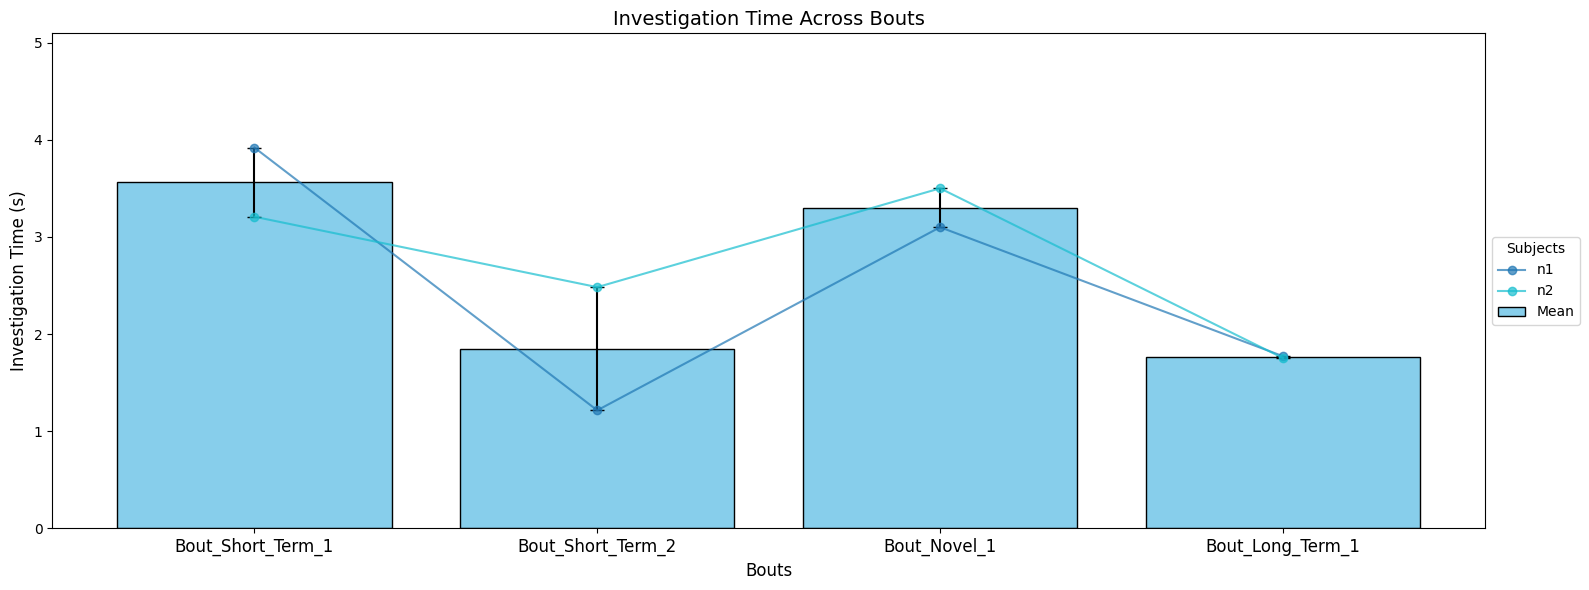

In [7]:
plot_y_across_bouts(inv_duration_df, 'Investigation Time Across Bouts','Investigation Time (s)')

## Mean DA During 1st Investigation

In [8]:
# Define the columns representing the bouts
columns = ['Bout_Short_Term_1', 'Bout_Short_Term_2', 'Bout_Novel_1', 'Bout_Long_Term_1']

# Initialize an empty list to hold the data for each subject
data_list = []

# Populate the data_list from the group_data.blocks
for block_data in group_data.blocks.values():
    if hasattr(block_data, 'bout_dict') and block_data.bout_dict:  # Ensure bout_dict exists and is populated
        # Use the subject name from the TDTData object
        block_data_dict = {'Subject': block_data.subject_name}
        
        for bout in columns:  # Only process bouts in the given list of columns
            if bout in block_data.bout_dict and 'Investigation' in block_data.bout_dict[bout]:
                # Collect the mean DA during the first investigation for this subject and bout
                if block_data.bout_dict[bout]['Investigation']:  # Ensure there is an Investigation event
                    first_investigation = block_data.bout_dict[bout]['Investigation'][0]  # First investigation
                    if 'Mean zscore' in first_investigation:
                        mean_da_first_investigation = first_investigation['Mean zscore']
                    else:
                        mean_da_first_investigation = np.nan  # If no z-score data, assign NaN
                else:
                    mean_da_first_investigation = np.nan  # If no investigation event, assign NaN
                
                block_data_dict[bout] = mean_da_first_investigation
            else:
                block_data_dict[bout] = np.nan  # If no data, assign NaN
                
        # Append the block's data to the data_list
        data_list.append(block_data_dict)

# Convert the data_list into a DataFrame
inv_mean_df = pd.DataFrame(data_list)

# Set the index to 'Subject'
inv_mean_df.set_index('Subject', inplace=True)

# Print the DataFrame to verify the data
print(inv_mean_df.head())


         Bout_Short_Term_1  Bout_Short_Term_2  Bout_Novel_1  Bout_Long_Term_1
Subject                                                                      
n1                3.200529          -0.265530     -0.031768          1.944856
n2                0.694966          -0.607511     -0.840188          4.702540


C:\Users\alber\AppData\Local\Temp\ipykernel_18808\339050406.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(df))  # Use a colormap with enough unique colors for each subject


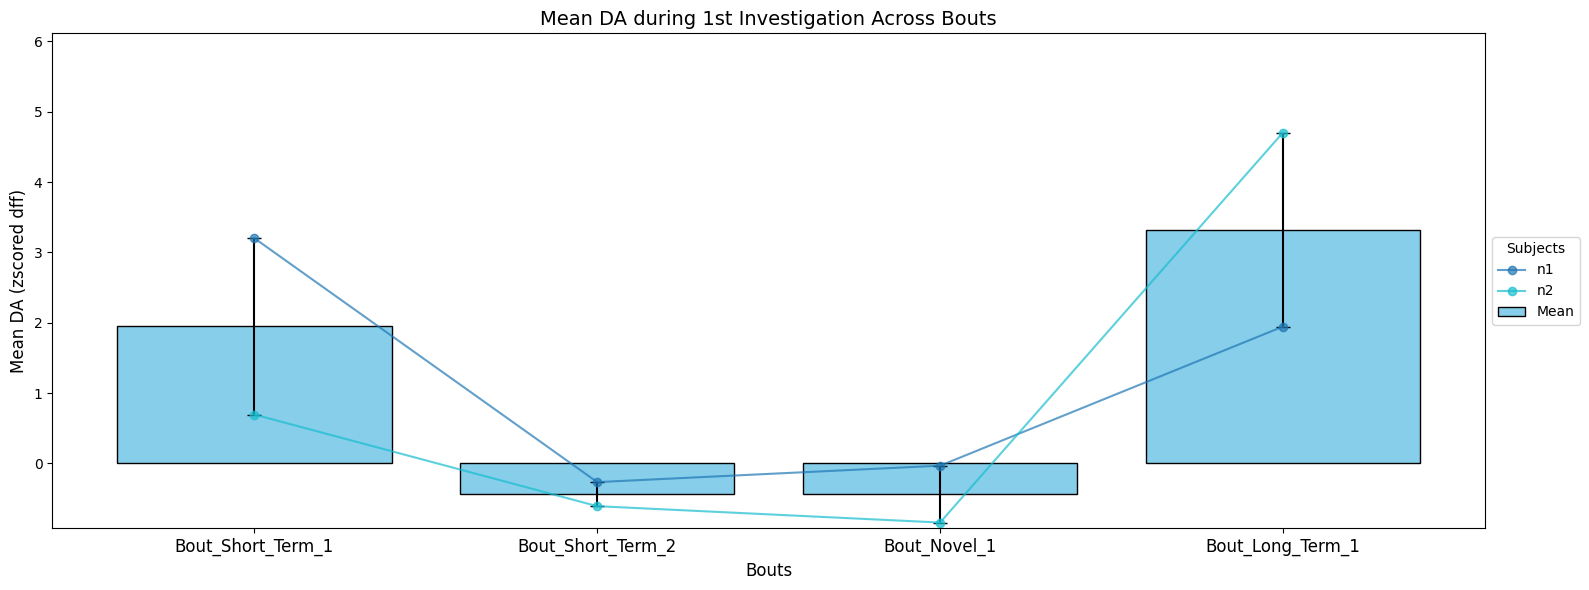

In [9]:
plot_y_across_bouts(inv_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')

1st investigation PSTH

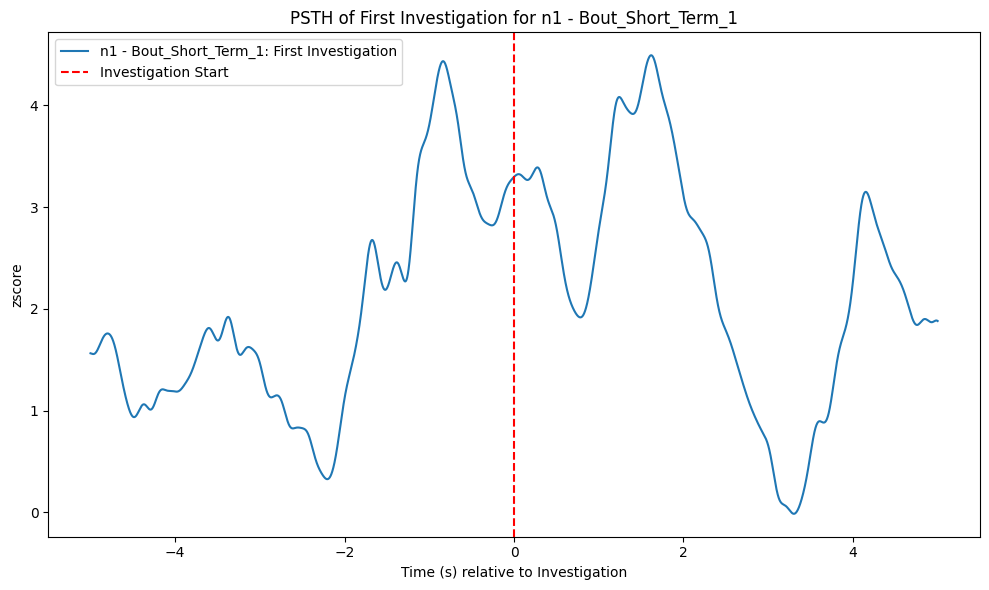

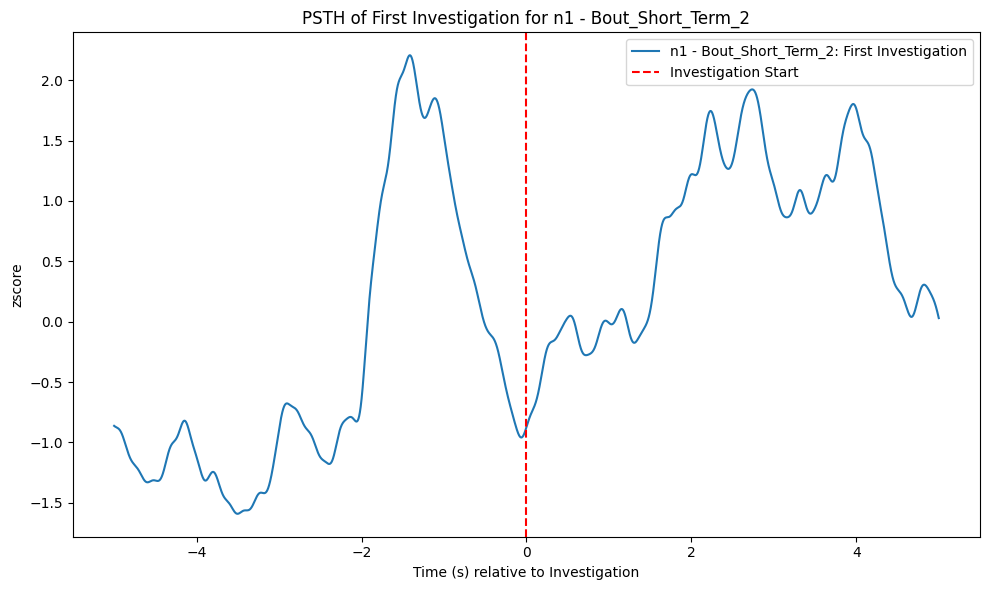

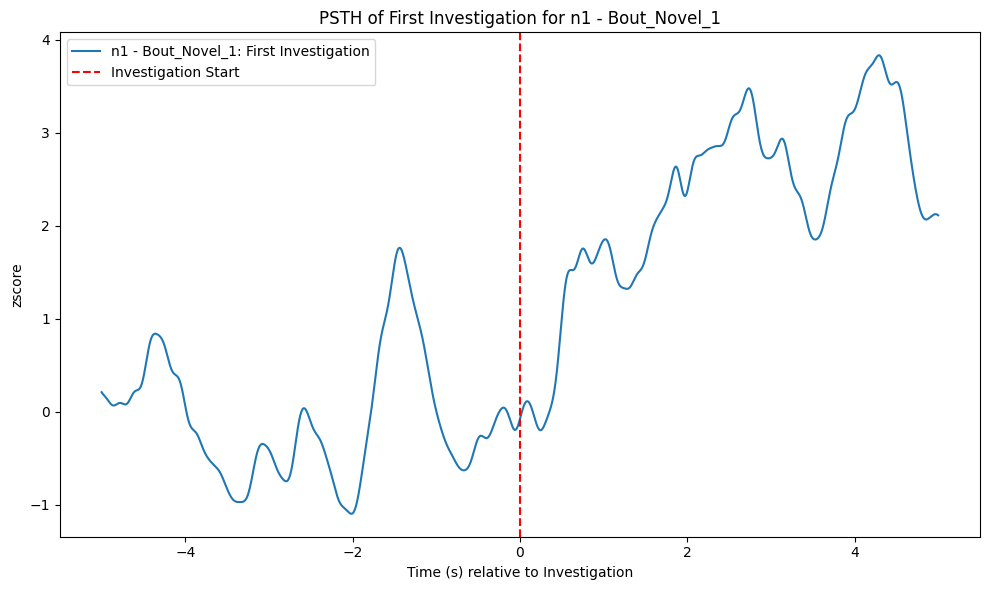

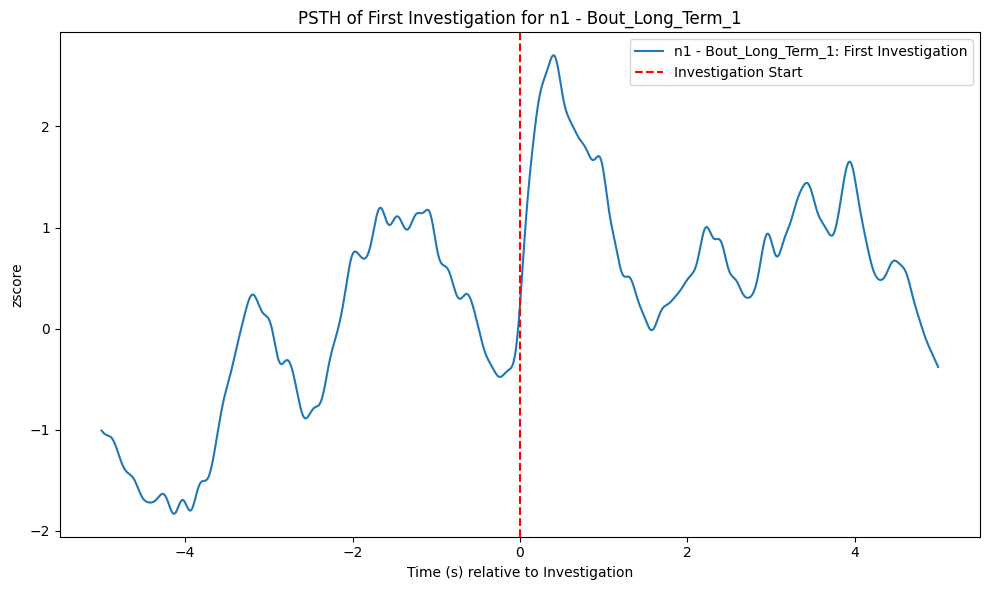

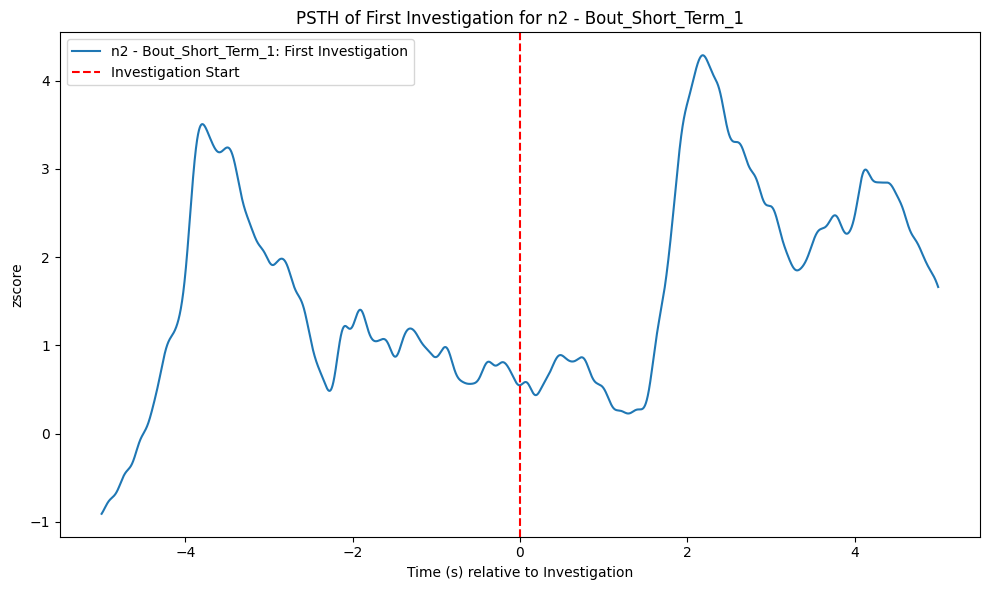

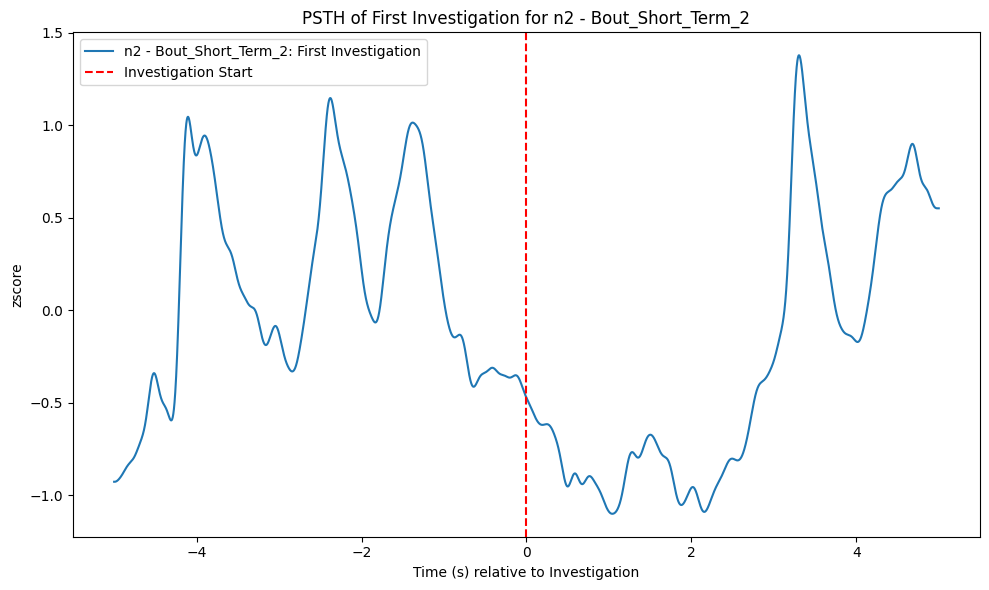

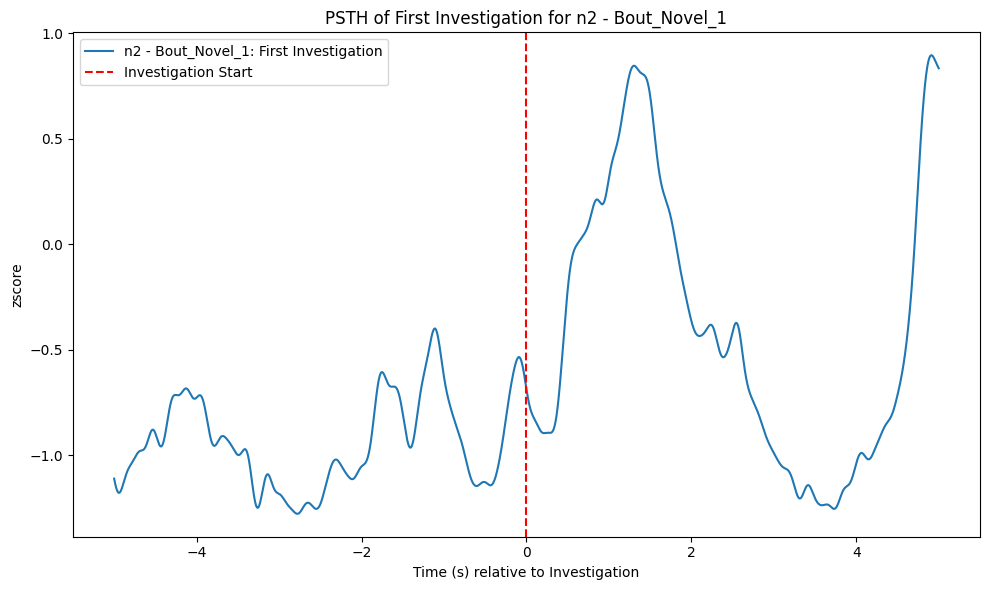

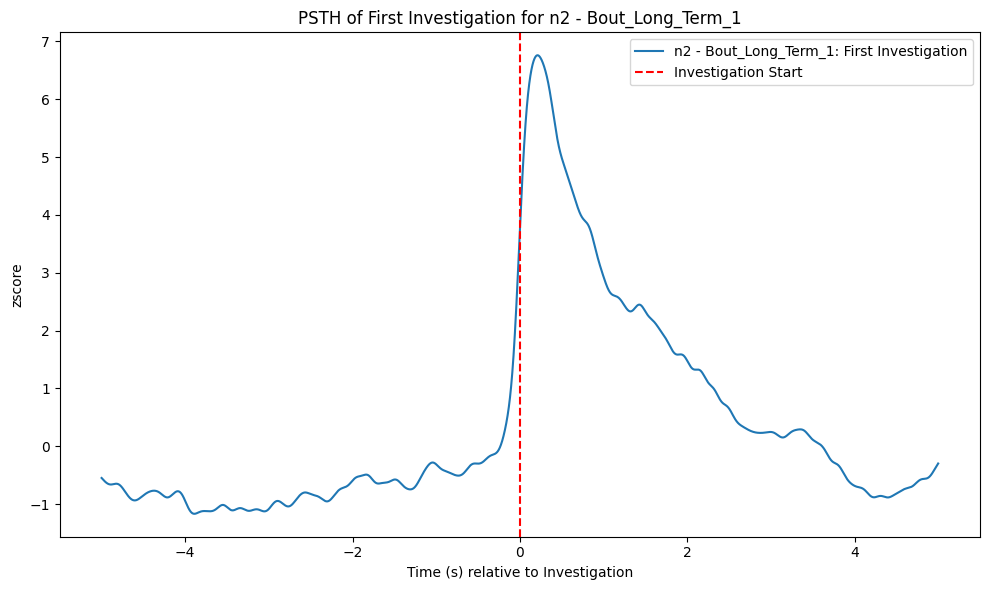

In [10]:
def plot_first_investigation_psth_all_bouts(group_data, pre_time=5, post_time=5, signal_type='zscore'):
    """
    Plots the PSTH for the first investigation event for all bouts in each block in the group.

    Parameters:
    - group_data: The GroupTDTData object containing the blocks.
    - pre_time: Time (in seconds) to plot before the event.
    - post_time: Time (in seconds) to plot after the event.
    - signal_type: The type of signal to use for the PSTH ('dFF' or 'zscore').
    """

    for block_name, tdt_data_obj in group_data.blocks.items():
        # Iterate through each bout in the bout_dict
        for bout_name, bout_data in tdt_data_obj.bout_dict.items():
            # Check if the bout contains investigation events
            if 'Investigation' in bout_data and bout_data['Investigation']:
                # Get the first investigation event
                first_investigation = bout_data['Investigation'][0]

                if first_investigation['Start Time'] is not None:
                    # Extract the start time of the first investigation
                    event_start = first_investigation['Start Time']

                    # Define the time window for the PSTH
                    pre_event_time = event_start - pre_time
                    post_event_time = event_start + post_time

                    # Extract the signal type (dFF or zscore) and timestamps
                    if signal_type == 'dFF':
                        signal = tdt_data_obj.dFF
                    elif signal_type == 'zscore':
                        signal = tdt_data_obj.zscore
                    else:
                        raise ValueError("Invalid signal type. Use 'dFF' or 'zscore'.")

                    timestamps = tdt_data_obj.timestamps

                    # Find indices within the pre and post event time window
                    psth_indices = (timestamps >= pre_event_time) & (timestamps <= post_event_time)
                    psth_times = timestamps[psth_indices] - event_start  # Time relative to event
                    psth_signal = signal[psth_indices]

                    # Plot the PSTH for this bout
                    plt.figure(figsize=(10, 6))
                    plt.plot(psth_times, psth_signal, label=f'{tdt_data_obj.subject_name} - {bout_name}: First Investigation')
                    plt.axvline(0, color='red', linestyle='--', label='Investigation Start')
                    plt.xlabel('Time (s) relative to Investigation')
                    plt.ylabel(signal_type)
                    plt.title(f'PSTH of First Investigation for {tdt_data_obj.subject_name} - {bout_name}')
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

# Example usage:
# Assuming `group_data` is an instance of `GroupTDTData` and `hc_processing()` has been called
plot_first_investigation_psth_all_bouts(group_data, pre_time=5, post_time=5, signal_type='zscore')


## All Investigations

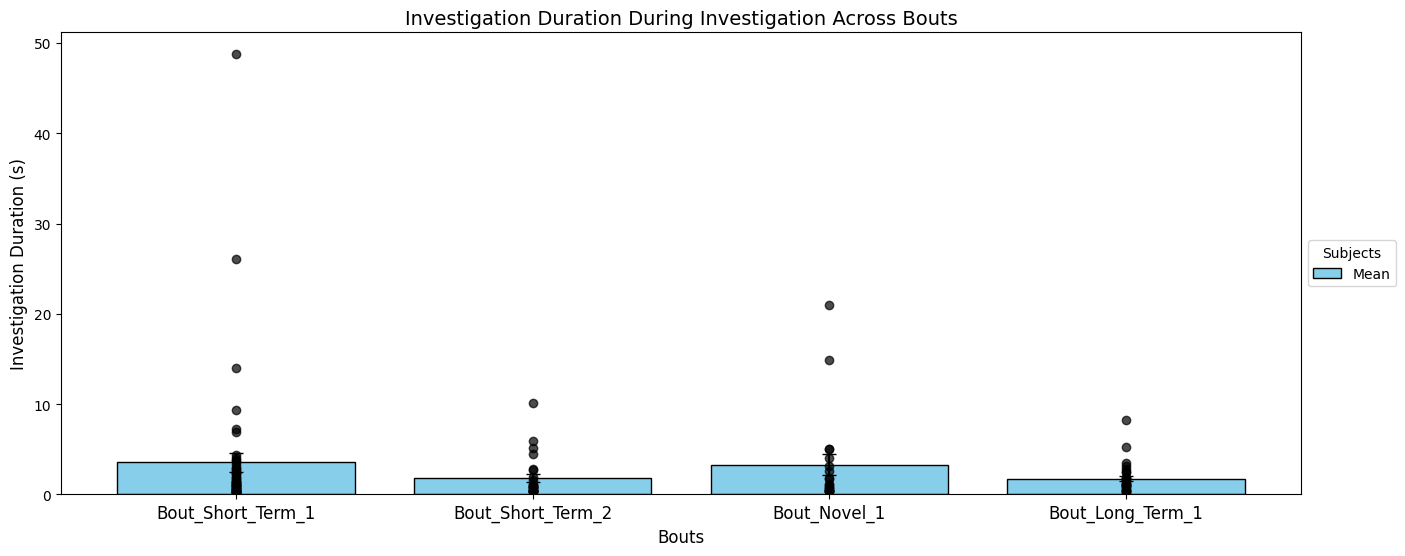

In [11]:
group_data.plot_investigation_durations_boutwise()

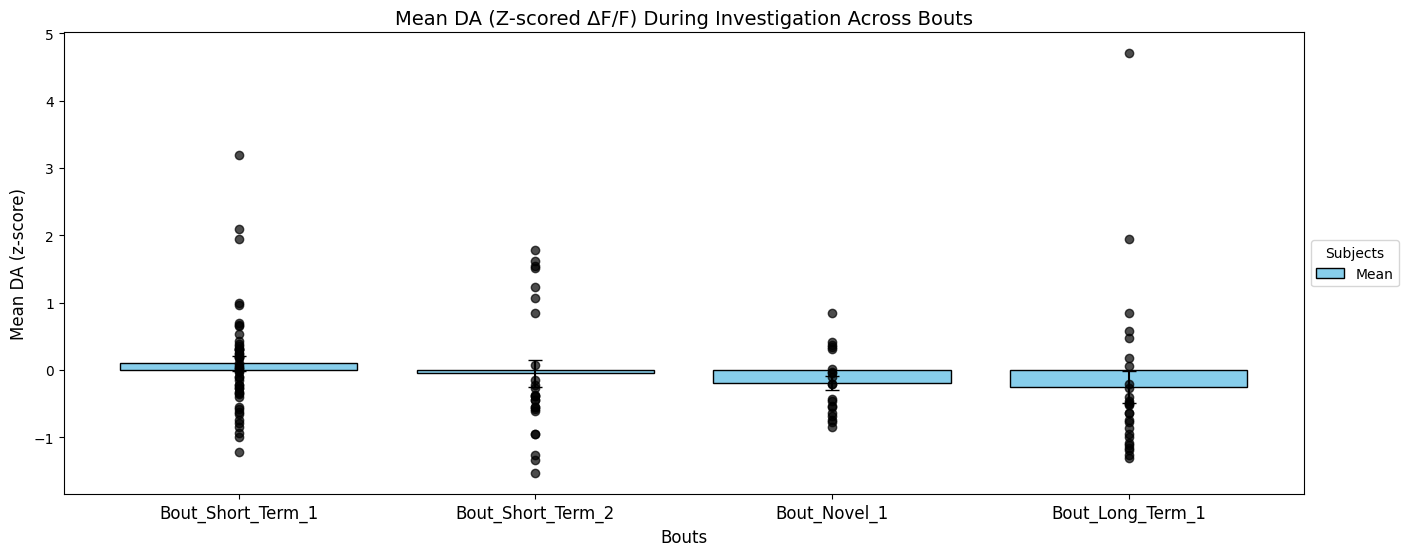

In [12]:
group_data.plot_investigation_mean_DA_boutwise()